<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/SampleProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Modules**

In [102]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [103]:
#Bioinformatics data analysis and visualization toolkit
#!pip install bioinfokit

In [104]:
#from bioinfokit.visuz import cluster

## **Upload File**

In [105]:
#from google.colab import files
#uploaded = files.upload()

In [233]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/jiaxunguo/INSE6220project/main/fruits.csv')
df.head(n=25)

,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,Class
0,1427.5811,515.6693,354.6234,0.7260,427.2253,0.9865,145320,0
1,1671.4170,615.8516,403.3667,0.7557,497.3849,0.9870,196863,0
2,1503.5980,546.4366,361.8018,0.7494,443.1601,0.9883,156070,0
3,1463.5551,544.9724,361.5594,0.7482,443.4745,0.9944,155339,0
4,1403.3560,542.0650,326.1642,0.7987,419.5720,0.9935,139162,0
5,1467.7220,573.7374,333.2054,0.8141,436.7935,0.9918,151080,0
6,1569.0680,587.9650,367.5672,0.7805,464.0740,0.9923,170461,0
7,1530.7870,564.7152,362.0923,0.7674,451.0723,0.9920,161095,0
8,1487.1000,534.5702,393.8198,0.6762,457.7480,0.9923,165851,0
9,1426.8580,535.9053,345.1051,0.7651,429.6369,0.9922,146121,0


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PERIMETER     226 non-null    float64
 1   MAJOR_AXIS    226 non-null    float64
 2   MINOR_AXIS    226 non-null    float64
 3   ECCENTRICITY  226 non-null    float64
 4   EQDIASQ       226 non-null    float64
 5   SOLIDITY      226 non-null    float64
 6   CONVEX_AREA   226 non-null    int64  
 7   Class         226 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 14.2 KB


### **Classes**

In [235]:
y = df['Class']
target = df['Class'].to_numpy()

### **Features**

Data Matrix

In [236]:
X = df.iloc[:,0:7]
X.head(10)

,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA
0,1427.5811,515.6693,354.6234,0.7260,427.2253,0.9865,145320
1,1671.4170,615.8516,403.3667,0.7557,497.3849,0.9870,196863
2,1503.5980,546.4366,361.8018,0.7494,443.1601,0.9883,156070
3,1463.5551,544.9724,361.5594,0.7482,443.4745,0.9944,155339
4,1403.3560,542.0650,326.1642,0.7987,419.5720,0.9935,139162
5,1467.7220,573.7374,333.2054,0.8141,436.7935,0.9918,151080
6,1569.0680,587.9650,367.5672,0.7805,464.0740,0.9923,170461
7,1530.7870,564.7152,362.0923,0.7674,451.0723,0.9920,161095
8,1487.1000,534.5702,393.8198,0.6762,457.7480,0.9923,165851
9,1426.8580,535.9053,345.1051,0.7651,429.6369,0.9922,146121


In [237]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PERIMETER,226.0,2014.929916,471.784851,1039.9240,1490.169425,2218.76550,2404.347500,2722.6831
MAJOR_AXIS,226.0,738.401882,169.105237,372.3486,561.871275,805.67950,876.810050,1036.5886
MINOR_AXIS,226.0,469.617240,110.372510,270.6614,358.065075,487.85380,560.343200,679.2316
ECCENTRICITY,226.0,0.758741,0.072622,0.5259,0.710825,0.76635,0.814075,0.9035
EQDIASQ,226.0,584.559966,127.802238,288.9840,443.852850,639.16520,686.997175,779.2183
SOLIDITY,226.0,0.980496,0.015470,0.8366,0.976450,0.98455,0.989450,0.9947
CONVEX_AREA,226.0,287273.765487,114382.176842,78398.0000,156443.000000,328771.00000,379292.000000,483065.0000


Notice that the data is not standardizd. So we need to standarize it.

In [238]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [239]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PERIMETER,226.0,8.803184e-16,1.00222,-2.071220,-1.114757,0.433011,0.827246,1.503491
MAJOR_AXIS,226.0,-1.006078e-15,1.00222,-2.169453,-1.046227,0.398728,0.820290,1.767235
MINOR_AXIS,226.0,-3.143994e-17,1.00222,-1.806586,-1.012931,0.165594,0.823822,1.903369
ECCENTRICITY,226.0,-6.287989e-16,1.00222,-3.213311,-0.661264,0.105006,0.763632,1.997736
EQDIASQ,226.0,-4.401592e-16,1.00222,-2.317894,-1.103419,0.428212,0.803308,1.526502
SOLIDITY,226.0,3.112554e-15,1.00222,-9.322247,-0.262148,0.262606,0.580050,0.920168
CONVEX_AREA,226.0,0.000000e+00,1.00222,-1.830175,-1.146343,0.363600,0.806266,1.715528


Notice that the data is now standardizd.

**Observations and variables**

In [240]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

## **Data Visualisation**

### Class Distribution

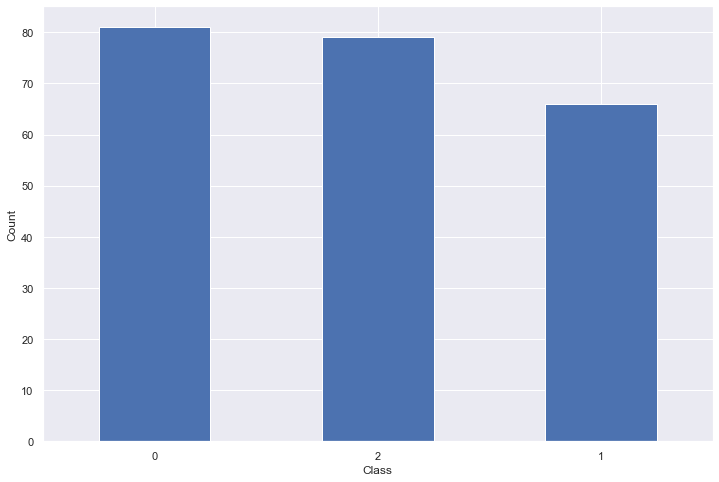

In [209]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Box & Whisker Plots

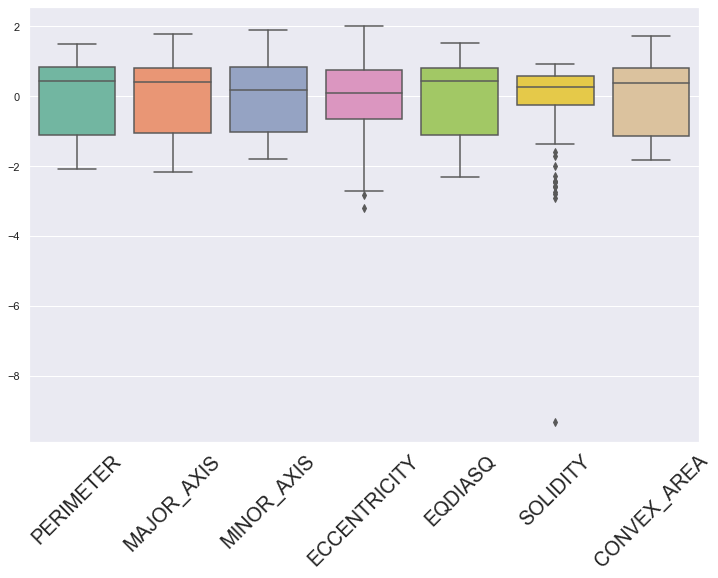

In [210]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, size=20);

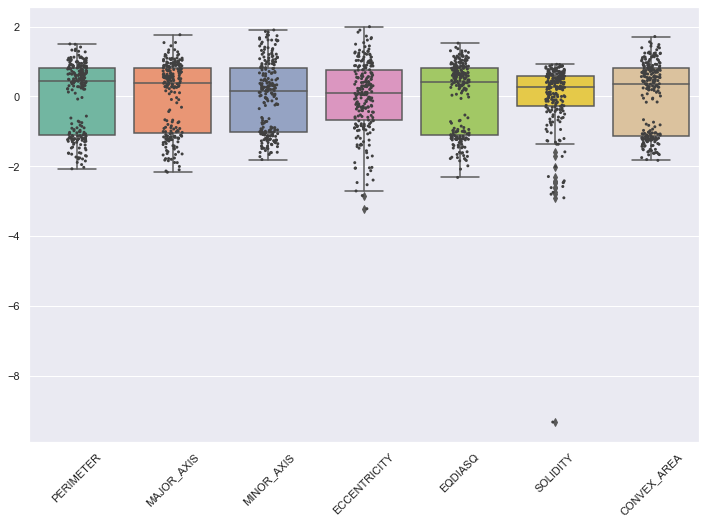

In [211]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25", size = 3) 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Five Number Summary

In [117]:
df.describe()

,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA
count,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,226.000000
mean,8.803184e-16,-1.006078e-15,-3.143994e-17,-6.287989e-16,-4.401592e-16,3.112554e-15,0.000000
std,1.002220e+00,1.002220e+00,1.002220e+00,1.002220e+00,1.002220e+00,1.002220e+00,1.002220
min,-2.071220e+00,-2.169453e+00,-1.806586e+00,-3.213311e+00,-2.317894e+00,-9.322247e+00,-1.830175
25%,-1.114757e+00,-1.046227e+00,-1.012931e+00,-6.612641e-01,-1.103419e+00,-2.621475e-01,-1.146343
50%,4.330110e-01,3.987278e-01,1.655941e-01,1.050055e-01,4.282119e-01,2.626062e-01,0.363600
75%,8.272457e-01,8.202904e-01,8.238224e-01,7.636317e-01,8.033083e-01,5.800498e-01,0.806266
max,1.503491e+00,1.767235e+00,1.903369e+00,1.997736e+00,1.526502e+00,9.201679e-01,1.715528


### Pair Plot

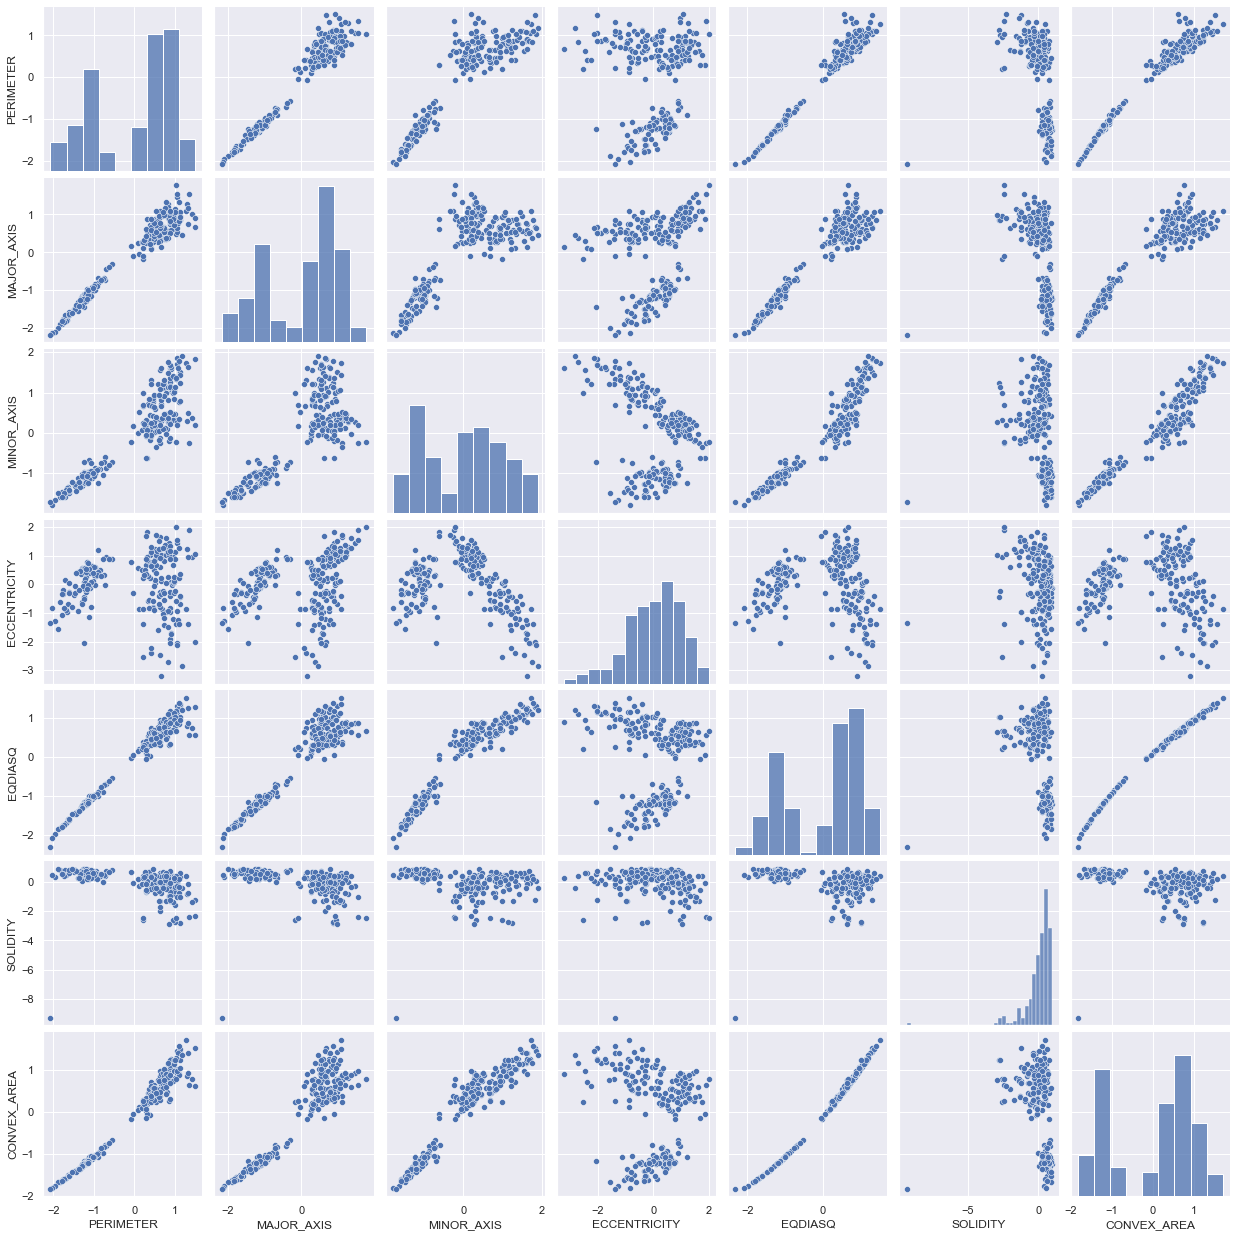

In [118]:
sns.pairplot(df)

## **Covariance**

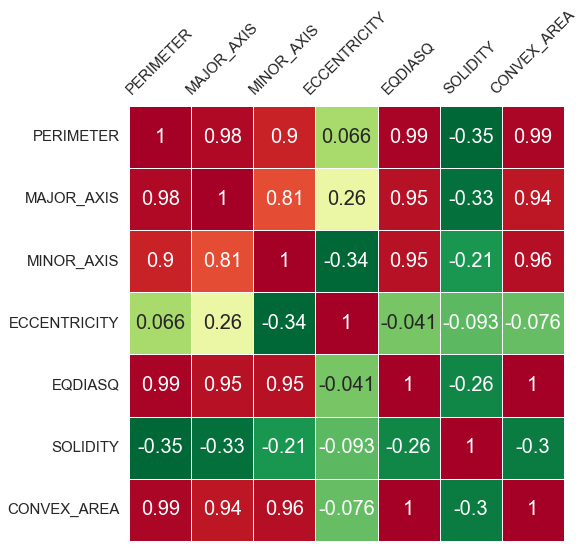

In [212]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True, annot_kws=dict(size=20))
plt.yticks(rotation=0, size=15)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, size=15);
#plt.title('Covariance matrix')

## **Principal Component Analysis (PCA)**

Z:
[[ 2.74720927e+00  4.57002917e-01  2.37382996e-01 ...  9.88548795e-03
   1.75729252e-02 -1.17784061e-02]
 [ 1.62921834e+00  1.33860104e-01 -1.21592517e-01 ...  3.95697449e-02
   8.14836794e-02 -1.06128398e-02]
 [ 2.49214183e+00  1.99641204e-01 -3.05159866e-02 ...  5.55239671e-02
   3.29490364e-02  1.35385371e-04]
 ...
 [-1.73735602e+00 -1.56449356e+00  4.70327557e-01 ... -2.11935805e-02
  -2.30796504e-02 -3.71560743e-03]
 [-1.86168397e+00 -8.16859410e-01 -5.99222732e-01 ... -6.57446766e-02
  -5.05240518e-02 -7.96342076e-03]
 [-2.23046485e+00 -1.18693834e+00 -2.24546985e-02 ...  1.66044868e-01
  -6.22209692e-02  1.35125393e-02]]


Text(0, 0.5, '$Z_2$')

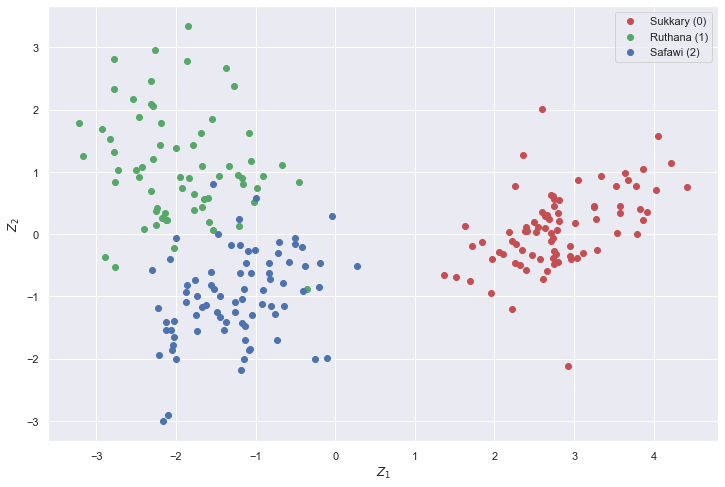

In [242]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)
print('Z:')
print(Z)

# Sukkary->0,  Ruthana->1, Safawi->2
idx_Sukkary = np.where(y == 0)
idx_Ruthana = np.where(y == 1)
idx_Safawi = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Sukkary,0], Z[idx_Sukkary,1], c='r', label='Sukkary (0)')
plt.scatter(Z[idx_Ruthana,0], Z[idx_Ruthana,1], c='g', label='Ruthana (1)')
plt.scatter(Z[idx_Safawi,0], Z[idx_Safawi,1], c='b', label='Safawi (2)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

### **Eigenvectors**

Eigenvector matrix:
[[-0.44887458 -0.07095441 -0.05157395  0.64031811  0.6159974  -0.02580594
   0.02629062]
 [-0.43180028 -0.23052062 -0.14886382  0.29312194 -0.65824879  0.33532531
   0.32648632]
 [-0.42434322  0.30529127  0.00217831 -0.56621997  0.30905477  0.32578048
   0.45218636]
 [ 0.01031391 -0.85216472 -0.33311245 -0.33194928  0.22349457 -0.03100325
   0.04054211]
 [-0.44978396  0.04551459 -0.10239098 -0.20216011 -0.07571262  0.23857609
  -0.82560235]
 [ 0.16380617  0.34113336 -0.92267884  0.06671781  0.01026163 -0.02212977
   0.02032322]
 [-0.45027604  0.06320364 -0.04889676 -0.16720316 -0.18961371 -0.84993446
   0.06757992]]


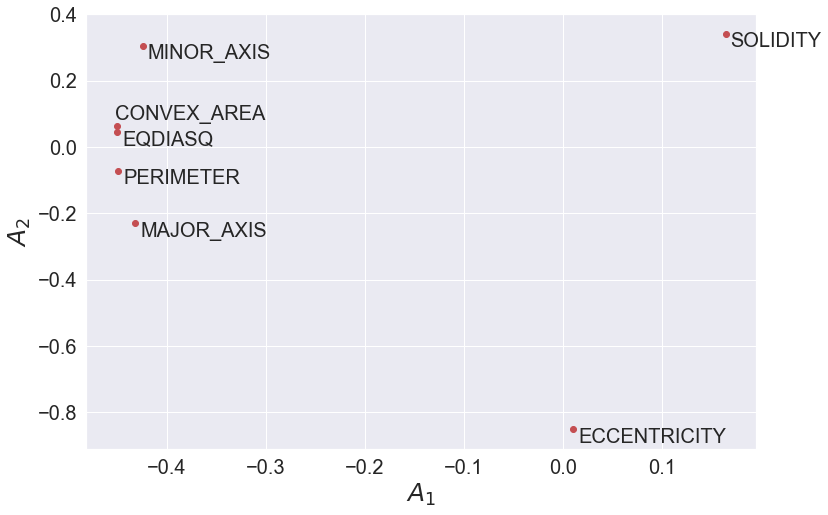

In [176]:
A = pca.components_.T 
print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('$A_1$', size=25)
plt.ylabel('$A_2$', size=25)
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    if label == 'CONVEX_AREA':
        plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='left', va='bottom', size=20)
        continue
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='left', va='top', size=20)

C:\Users\45997\anaconda3\envs\PyTorch\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


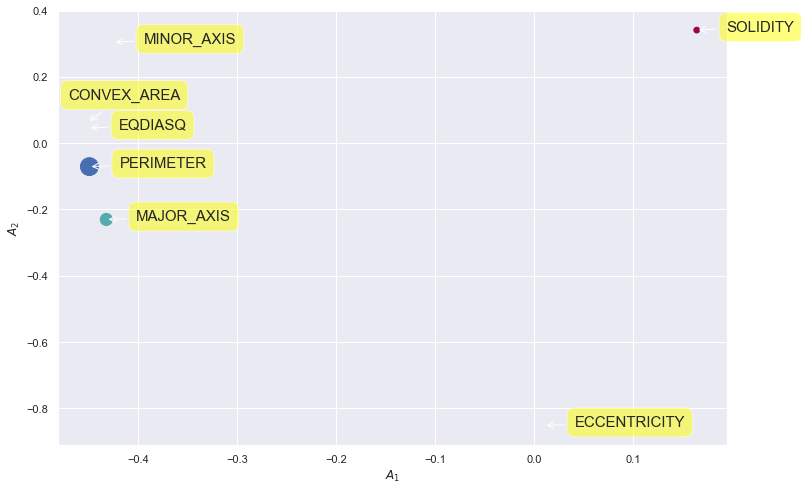

In [177]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    if label == 'CONVEX_AREA':
        plt.annotate(label,xy=(x, y), xytext=(-20, 20),
                     textcoords='offset points', ha='left', va='bottom', size=15,
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                     arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        continue
    plt.annotate(label,xy=(x, y), xytext=(30, 10),
      textcoords='offset points', ha='left', va='top', size=15,
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### **Scree plot**

Eigenvalues:
[4.90373775e+00 1.24955522e+00 8.54416986e-01 1.19316046e-02
 7.74841127e-03 3.55984454e-03 1.61293749e-04]


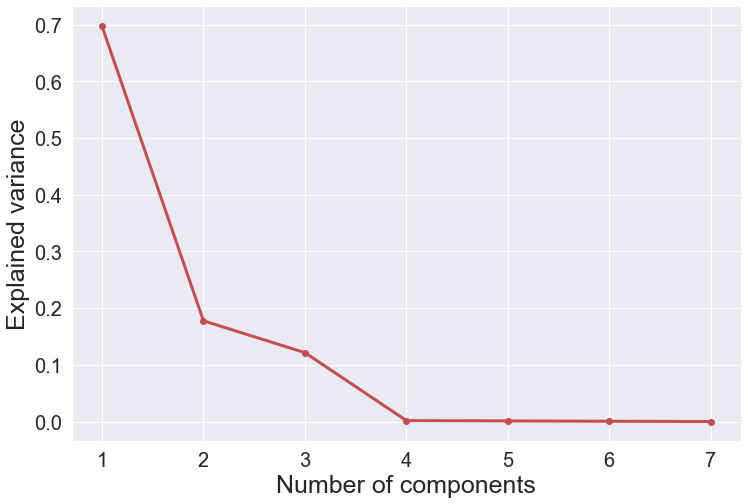

In [178]:
#Eigenvalues
Lambda = pca.explained_variance_
print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0, size=20)
plt.yticks(size=20)
plt.xlabel('Number of components', size=25)
plt.ylabel('Explained variance', size=25) 
plt.show()


### **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

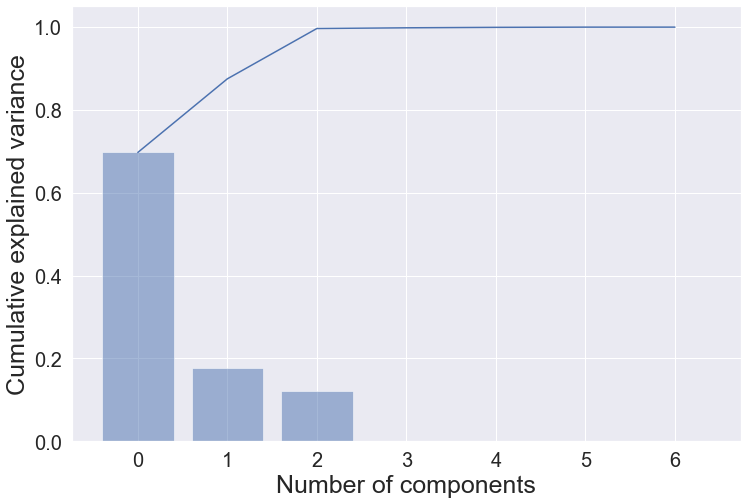

In [179]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Number of components', size=25)
plt.ylabel('Cumulative explained variance', size=25)

**Explained Variance per PC**

In [180]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (69.7%)',
 '1': 'PC 2 (17.8%)',
 '2': 'PC 3 (12.2%)',
 '3': 'PC 4 (0.2%)',
 '4': 'PC 5 (0.1%)',
 '5': 'PC 6 (0.1%)',
 '6': 'PC 7 (0.0%)'}

### **Biplot**

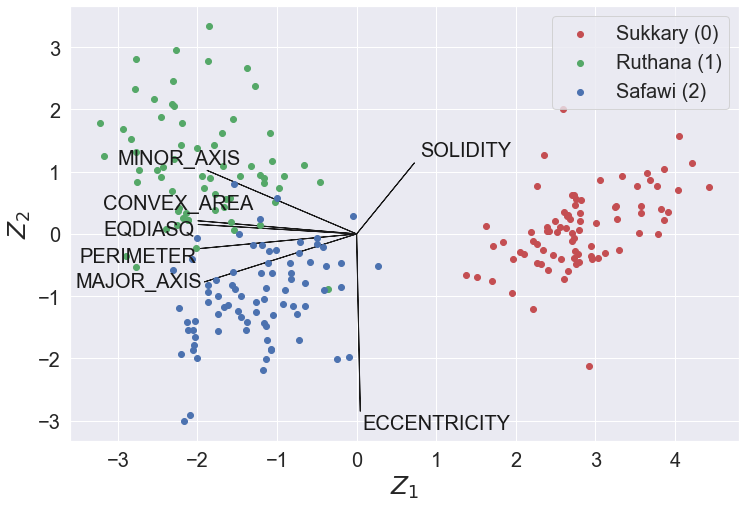

In [181]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('$Z_1$', size=25)
plt.ylabel('$Z_2$', size=25)
for i in range(len(A1)):
    # arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
    if variables[i] == 'CONVEX_AREA':
        plt.text(A1[i]*max(Z1)*1.6, A2[i]*max(Z2)*1.9, variables[i], color='k', size=20)
        continue
    elif variables[i] == 'EQDIASQ':
        plt.text(A1[i]*max(Z1)*1.6, A2[i]*max(Z2)*0., variables[i], color='k', size=20)
        continue
    elif variables[i] == 'PERIMETER':
        plt.text(A1[i]*max(Z1)*1.75, A2[i]*max(Z2)*1.9, variables[i], color='k', size=20)
        continue
    elif variables[i] == 'MAJOR_AXIS':
        plt.text(A1[i]*max(Z1)*1.85, A2[i]*max(Z2)*1.1, variables[i], color='k', size=20)
        continue
    elif variables[i] == 'SOLIDITY':
        plt.text(A1[i]*max(Z1)*1.1, A2[i]*max(Z2)*1.1, variables[i], color='k', size=20)
        continue
            
    plt.text(A1[i]*max(Z1)*1.6, A2[i]*max(Z2)*1.1, variables[i], color='k', size=20)

plt.scatter(Z[idx_Sukkary,0], Z[idx_Sukkary,1], c='r', label='Sukkary (0)')
plt.scatter(Z[idx_Ruthana,0], Z[idx_Ruthana,1], c='g', label='Ruthana (1)')
plt.scatter(Z[idx_Safawi,0], Z[idx_Safawi,1], c='b', label='Safawi (2)')
plt.legend(loc='upper right', fontsize=20)
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

In [127]:
#cluster.biplot(cscore=Z, loadings=A, labels=X.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2), 
#               var2=round(pca.explained_variance_ratio_[1]*100, 2), colorlist=target)

**Using PCA Librarry**

In [128]:
# !pip install pca

In [182]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [183]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC       feature   loading  type
0  PC1   CONVEX_AREA -0.450276  best
1  PC2  ECCENTRICITY -0.852165  best
2  PC3      SOLIDITY -0.922679  best
3  PC1     PERIMETER -0.448875  weak
4  PC1    MAJOR_AXIS -0.431800  weak
5  PC1    MINOR_AXIS -0.424343  weak
6  PC1       EQDIASQ -0.449784  weak


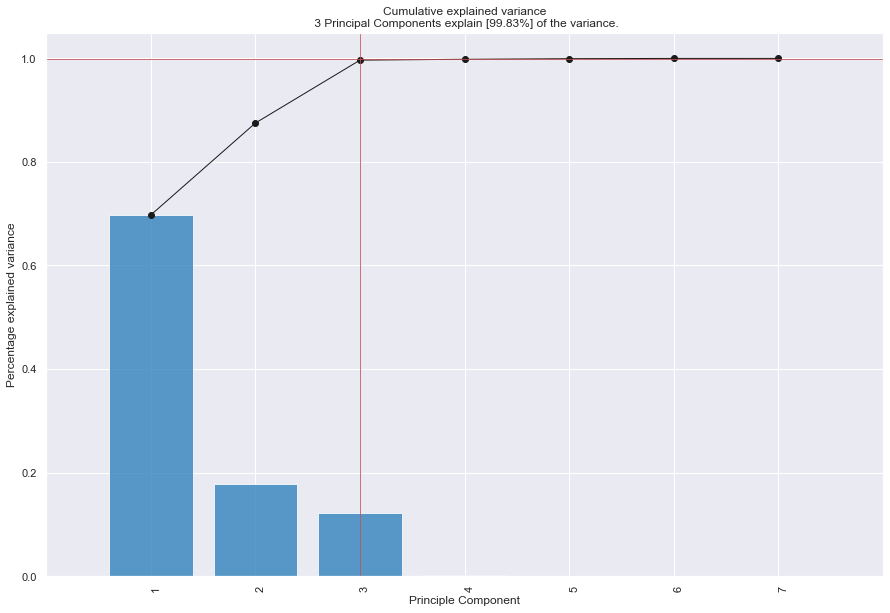

<Figure size 864x576 with 0 Axes>

In [184]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.


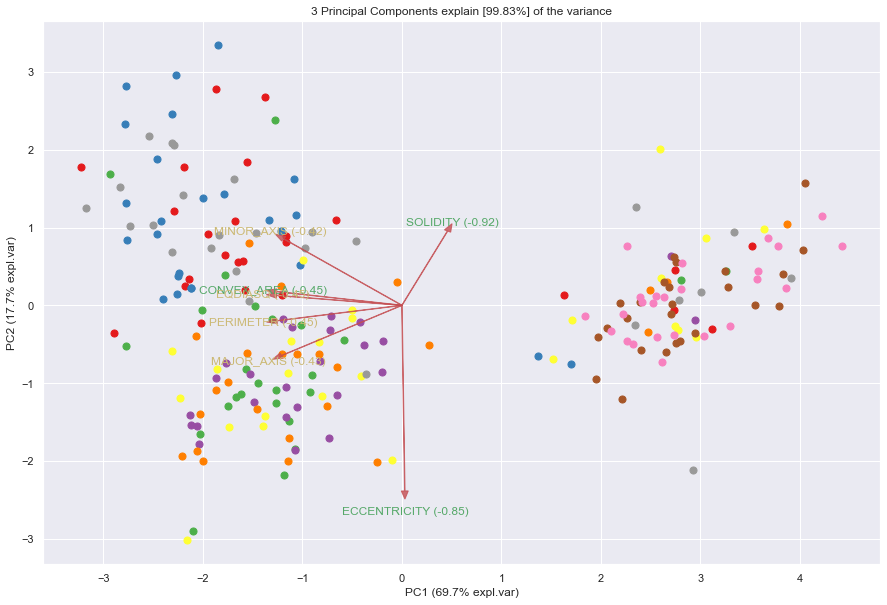

In [132]:
 ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.


C:\Users\45997\anaconda3\envs\PyTorch\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\45997\anaconda3\envs\PyTorch\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


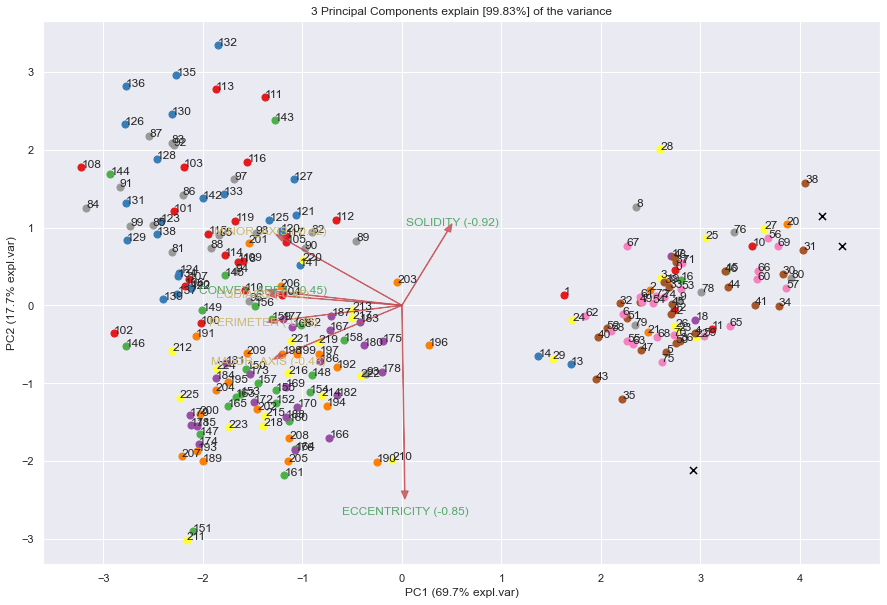

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'3 Principal Components explain [99.83%] of the variance'}, xlabel='PC1 (69.7% expl.var)', ylabel='PC2 (17.7% expl.var)'>)

In [133]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


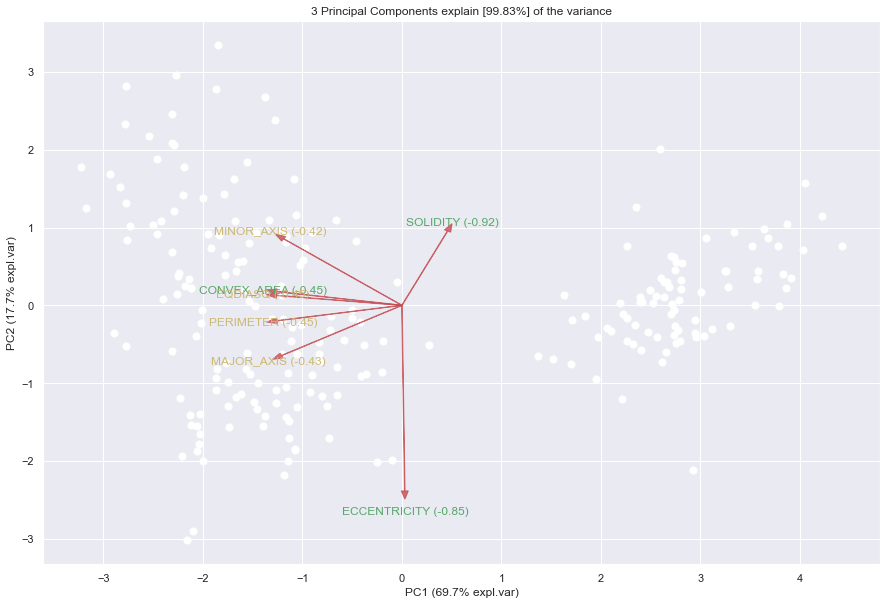

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'3 Principal Components explain [99.83%] of the variance'}, xlabel='PC1 (69.7% expl.var)', ylabel='PC2 (17.7% expl.var)'>)

In [134]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


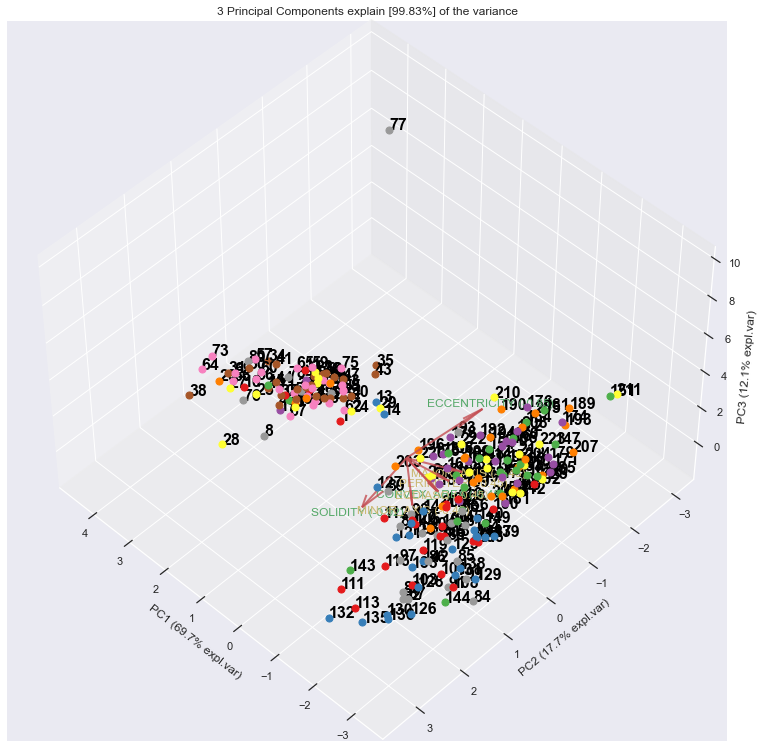

In [135]:
ax = model.biplot3d(legend=False)

### **Principal components**

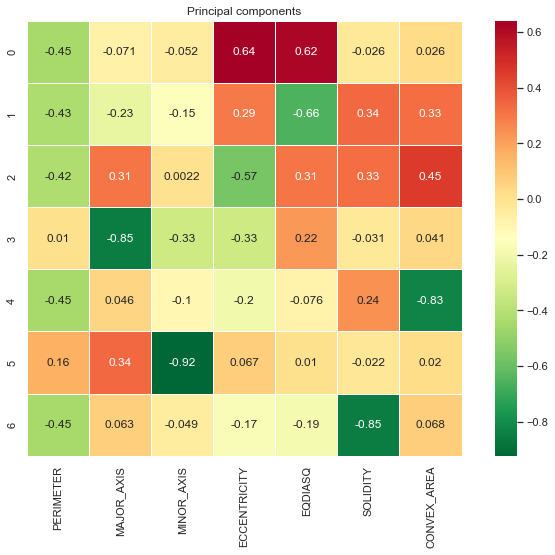

PC1:[-0.44887458 -0.43180028 -0.42434322  0.01031391 -0.44978396  0.16380617
 -0.45027604]
PC2:[-0.07095441 -0.23052062  0.30529127 -0.85216472  0.04551459  0.34113336
  0.06320364]


In [136]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
# ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

### **Hotelling's T2 test**

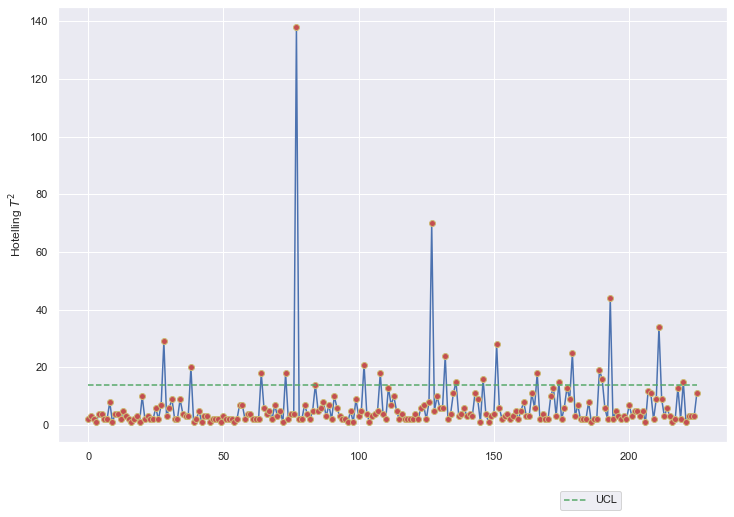

In [185]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [138]:
print(np.argwhere(Tsquare>UCL))

[[ 28]
 [ 38]
 [ 64]
 [ 73]
 [ 77]
 [ 84]
 [102]
 [108]
 [127]
 [132]
 [136]
 [146]
 [151]
 [166]
 [174]
 [179]
 [189]
 [190]
 [193]
 [211]
 [220]]


### **Control Charts for Principal Components**

C:\Users\45997\AppData\Local\Temp\ipykernel_22148\1105499817.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([0,0,50,100,150,200], fontsize=20)
C:\Users\45997\AppData\Local\Temp\ipykernel_22148\1105499817.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([0,-6,-4,-2,0,2,4,6], fontsize=20)
C:\Users\45997\AppData\Local\Temp\ipykernel_22148\1105499817.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([0,0,50,100,150,200], fontsize=20)
C:\Users\45997\AppData\Local\Temp\ipykernel_22148\1105499817.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([0,-3,-2,-1,0,1,2,3], fontsize=20)


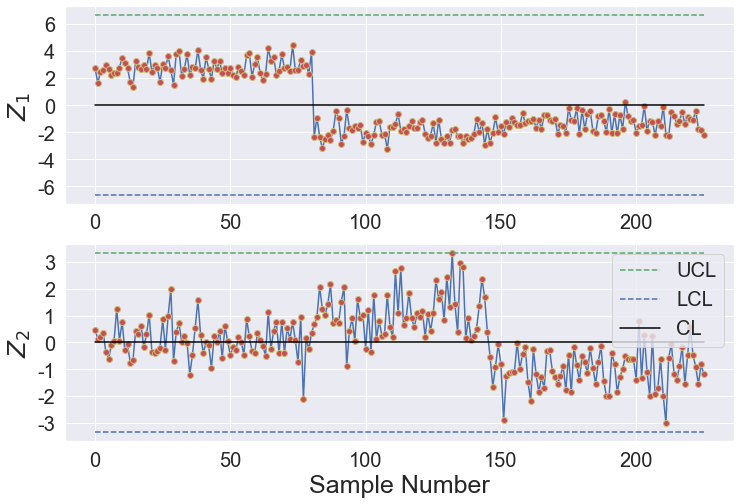

In [186]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$', size=25)
ax1.set_xticklabels([0,0,50,100,150,200], fontsize=20)
ax1.set_yticklabels([0,-6,-4,-2,0,2,4,6], fontsize=20)
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$', size=25)
ax2.set_xlabel('Sample Number', size=25)
ax2.set_xticklabels([0,0,50,100,150,200], fontsize=20)
ax2.set_yticklabels([0,-3,-2,-1,0,1,2,3], fontsize=20)
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend(fontsize=20)

#### Out of Control Points

In [43]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[]
[]
[]


## **Multi-Class Classification**

In [243]:
df = pd.read_csv('https://raw.githubusercontent.com/jiaxunguo/INSE6220project/main/fruits.csv')
y = df['Class']
X = df.iloc[:,0:7]
X.describe().transpose()
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns
df.describe().transpose()
observations = list(df.index)
variables = list(df.columns)

In [244]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 158
Test Dataset Size: 68


### Gaussian Naive Bayes (GNB)

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        22
           1      0.909     0.952     0.930        21
           2      0.958     0.920     0.939        25

    accuracy                          0.956        68
   macro avg      0.956     0.957     0.956        68
weighted avg      0.957     0.956     0.956        68



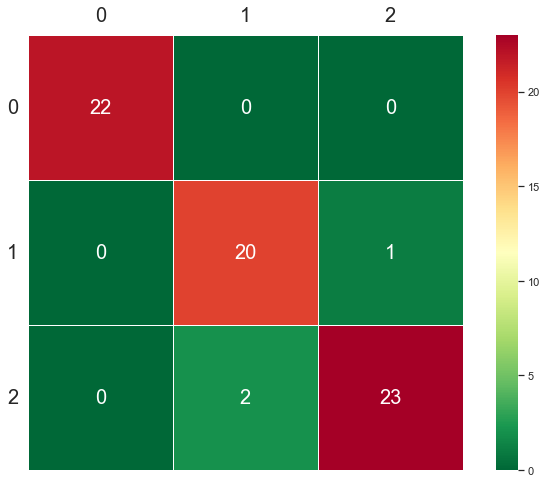

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        22
           1      0.952     0.952     0.952        21
           2      0.960     0.960     0.960        25

    accuracy                          0.971        68
   macro avg      0.971     0.971     0.971        68
weighted avg      0.971     0.971     0.971        68



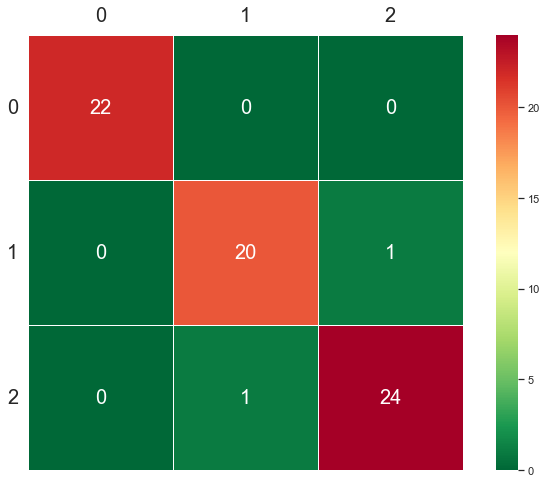

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        22
           1      0.952     0.952     0.952        21
           2      0.960     0.960     0.960        25

    accuracy                          0.971        68
   macro avg      0.971     0.971     0.971        68
weighted avg      0.971     0.971     0.971        68



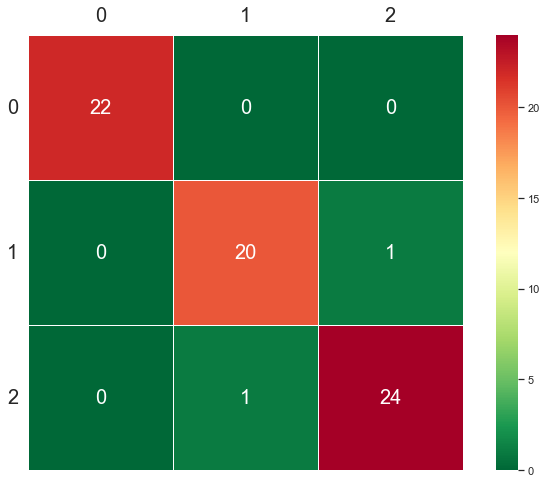

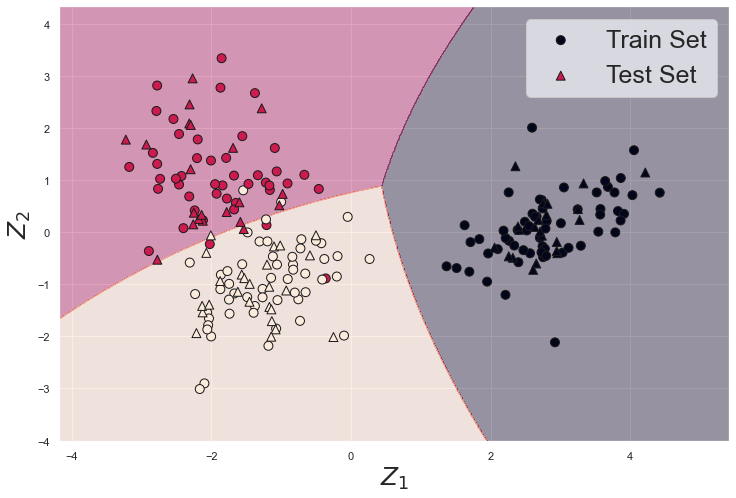

(array([39, 60], dtype=int64),)


In [245]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True,annot_kws=dict(size=20))
  plt.yticks(rotation=0,fontsize=20)
  ax.tick_params(labelbottom=False,labeltop=True,labelsize=20)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0,size=20)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=80, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=80, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$',size=25)
    plt.ylabel('$Z_2$',size=25)
    plt.legend(fontsize=25)
    plt.show()

    print(np.where(ytst != y_pred))

### K Nearest Neighbors (KNN)

Grid Search Results:
k_full_data: {'n_neighbors': 4}
k_Z: {'n_neighbors': 4}
k_Z12: {'n_neighbors': 4}
                                    0         1         2         3         4
knn_full_data fit_time       0.000997  0.000995  0.000997  0.001000  0.000972
knn_Z  fit_time              0.000997  0.000000  0.000000  0.000000  0.000000
knn_Z12 fit_time             0.000998  0.000000  0.000000  0.000000  0.000000
knn_full_data test_f1_macro  0.932660  0.932660  0.933333  0.964519  0.966583
knn_Z  test_f1_macro         0.932660  0.932660  0.933333  0.964519  0.966583
knn_Z12 test_f1_macro        0.965899  0.932660  0.966583  1.000000  1.000000

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        22
           1      0.913     1.000     0.955        21
           2      1.000     0.920     0.958        25

    accuracy                          0.971        68
   macro avg      0.971     0.973   

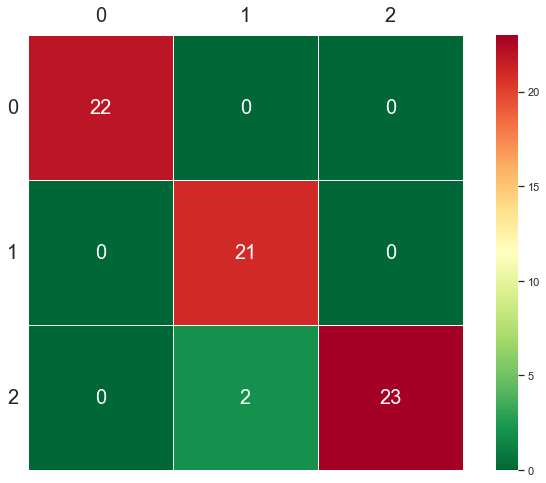

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        22
           1      0.913     1.000     0.955        21
           2      1.000     0.920     0.958        25

    accuracy                          0.971        68
   macro avg      0.971     0.973     0.971        68
weighted avg      0.973     0.971     0.971        68



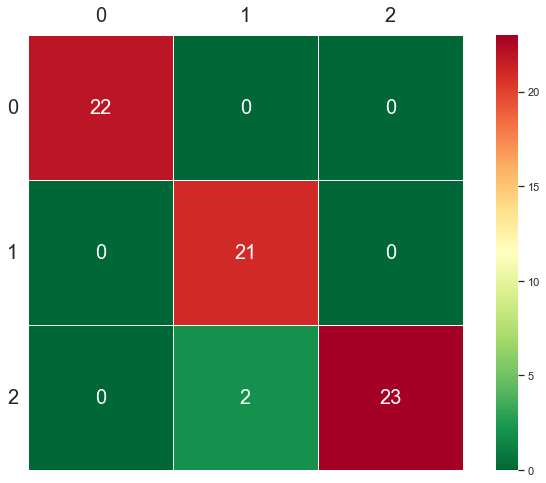

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        22
           1      0.952     0.952     0.952        21
           2      0.960     0.960     0.960        25

    accuracy                          0.971        68
   macro avg      0.971     0.971     0.971        68
weighted avg      0.971     0.971     0.971        68



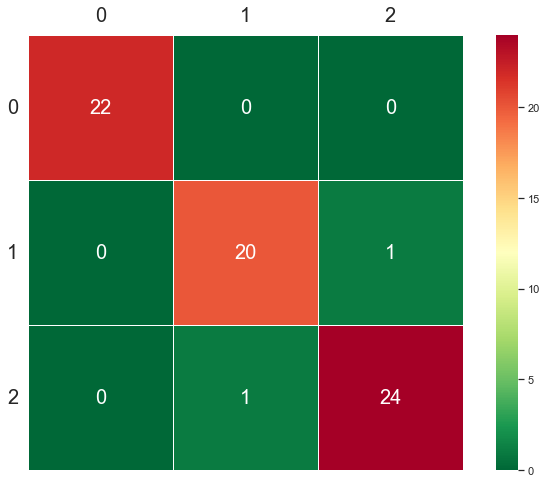

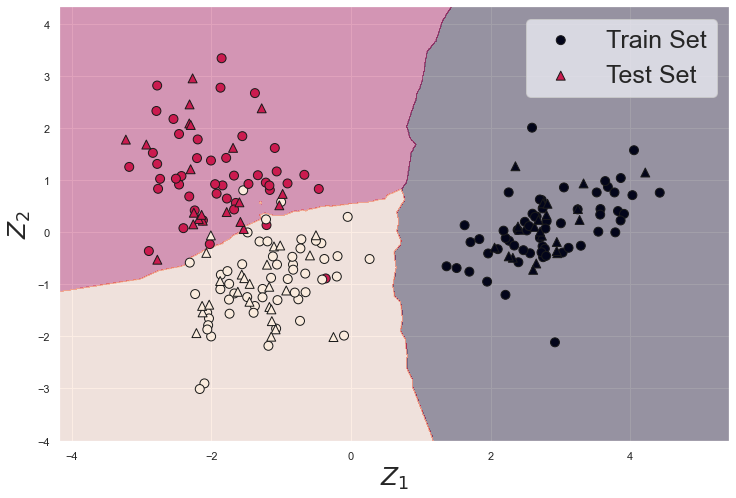

In [246]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True,annot_kws=dict(size=20))
  plt.yticks(rotation=0,fontsize=20)
  ax.tick_params(labelbottom=False,labeltop=True,labelsize=20)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0,size=20)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=80, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=80, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$',size=25)
    plt.ylabel('$Z_2$',size=25)
    plt.legend(fontsize=25)
    plt.show()

    # print(np.where(ytst != y_pred))

### Decision Trees (DT)

Grid Search Results:
depth_full_data: {'max_depth': 2}
depth_Z: {'max_depth': 2}
depth_Z12: {'max_depth': 2}
                                   0         1         2         3         4
dt_full_data fit_time       0.001993  0.000998  0.001995  0.000997  0.001004
dt_Z  fit_time              0.000997  0.000997  0.000000  0.000000  0.000000
dt_Z12 fit_time             0.000000  0.000000  0.000000  0.000000  0.000999
dt_full_data test_f1_macro  0.930556  0.865320  0.899749  0.964519  0.932660
dt_Z  test_f1_macro         0.893333  0.899749  0.899749  0.964519  0.965899
dt_Z12 test_f1_macro        0.893333  0.899749  0.899749  0.964519  0.965899

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        22
           1      0.905     0.905     0.905        21
           2      0.920     0.920     0.920        25

    accuracy                          0.941        68
   macro avg      0.942     0.942    

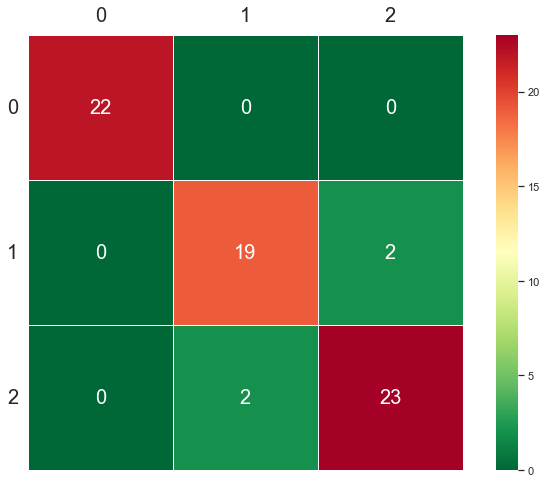

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        22
           1      1.000     0.952     0.976        21
           2      0.962     1.000     0.980        25

    accuracy                          0.985        68
   macro avg      0.987     0.984     0.985        68
weighted avg      0.986     0.985     0.985        68



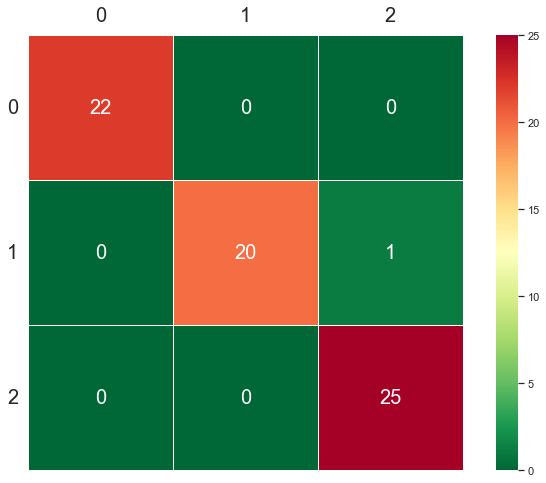

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        22
           1      1.000     0.952     0.976        21
           2      0.962     1.000     0.980        25

    accuracy                          0.985        68
   macro avg      0.987     0.984     0.985        68
weighted avg      0.986     0.985     0.985        68



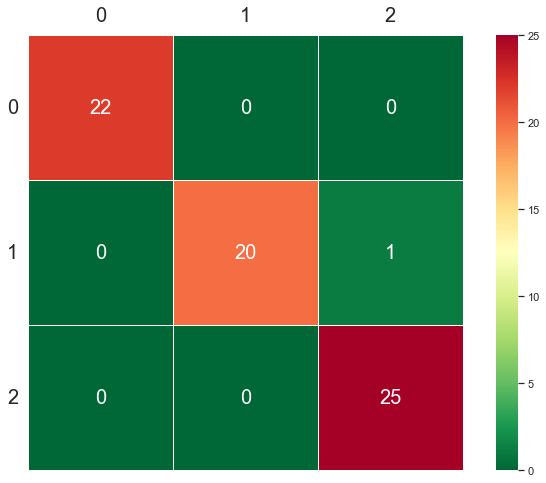

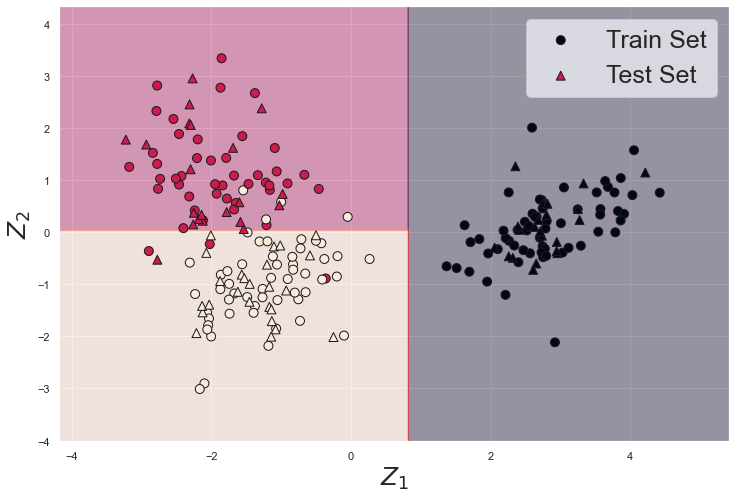

In [247]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
    # Apply on train-test split
    dt.fit(Xtr, ytr)
    y_pred = dt.predict(Xtst)
    dt_score = dt.score(Xtst, ytst)
    #print(dt_score)
    
    # Classification Report
    print(f'DATASET: {name}')
    print('Classification Report:')
    print(classification_report(ytst, y_pred, digits=3))
    
    # Confusion Matrix
    cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
    ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True,annot_kws=dict(size=20))
    plt.yticks(rotation=0,fontsize=20)
    ax.tick_params(labelbottom=False,labeltop=True,labelsize=20)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0,size=20)
    #plt.title('Decision Tree Confusion Matrix')
    plt.show()
    
    #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
    if name == 'Z12':
        # Plotting decision regions
        x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
        y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        
        Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=80, edgecolor="k", label='Train Set')
        plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=80, edgecolor="k", label='Test Set')
        plt.xlabel('$Z_1$',size=25)
        plt.ylabel('$Z_2$',size=25)
        plt.legend(fontsize=25)
        plt.show()

## **ROC Curves**

DATASET: FULL DATA


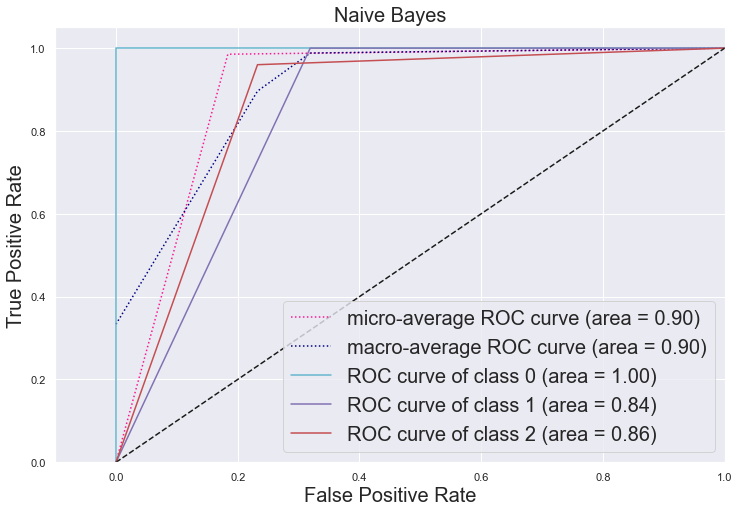

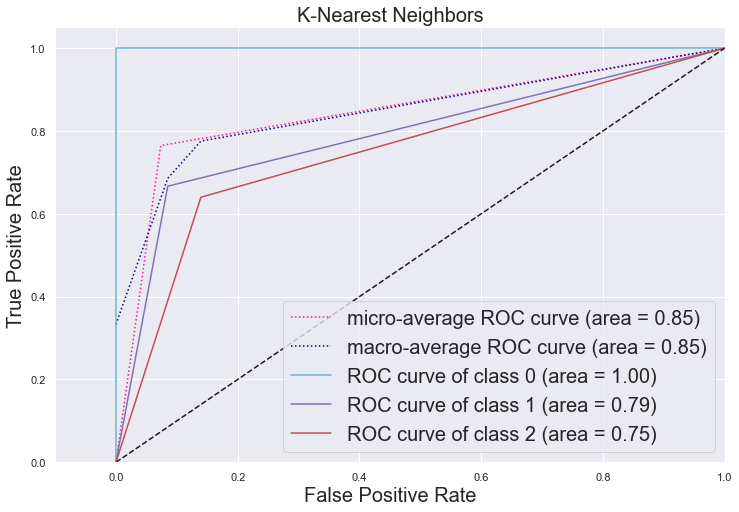

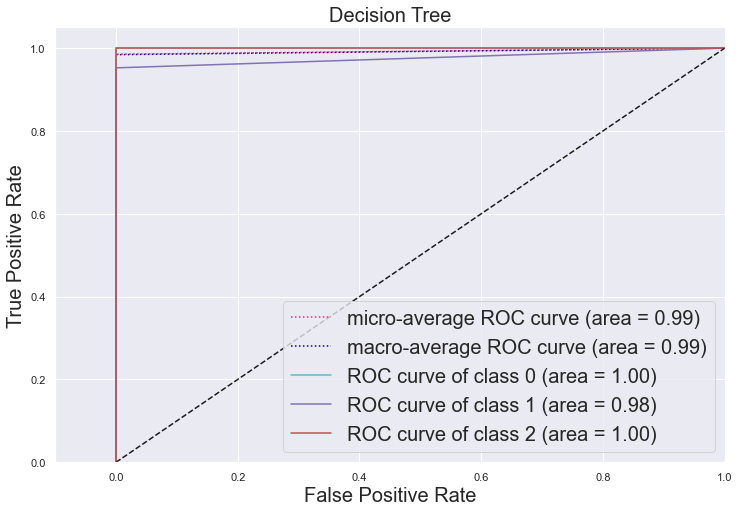

DATASET: Z


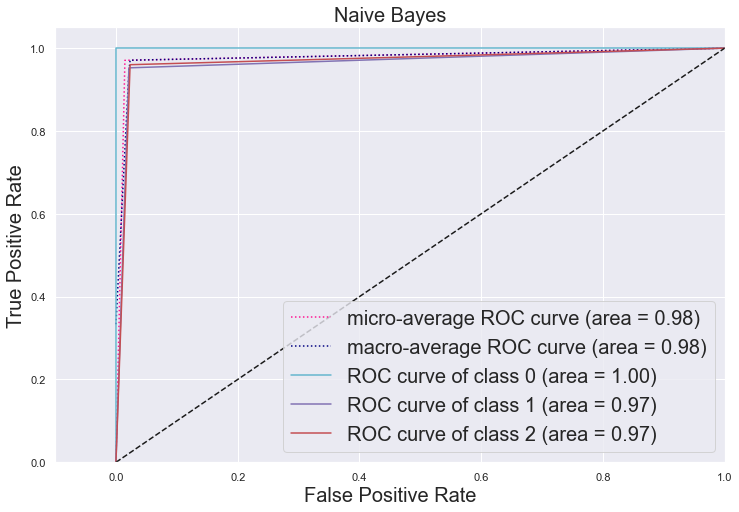

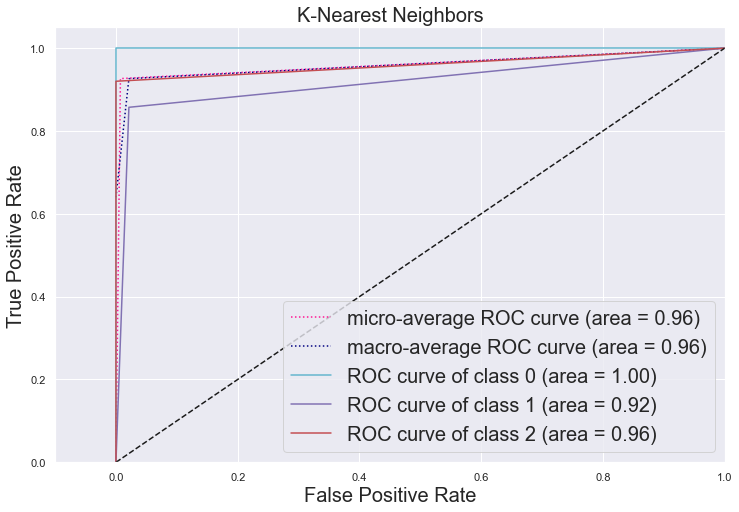

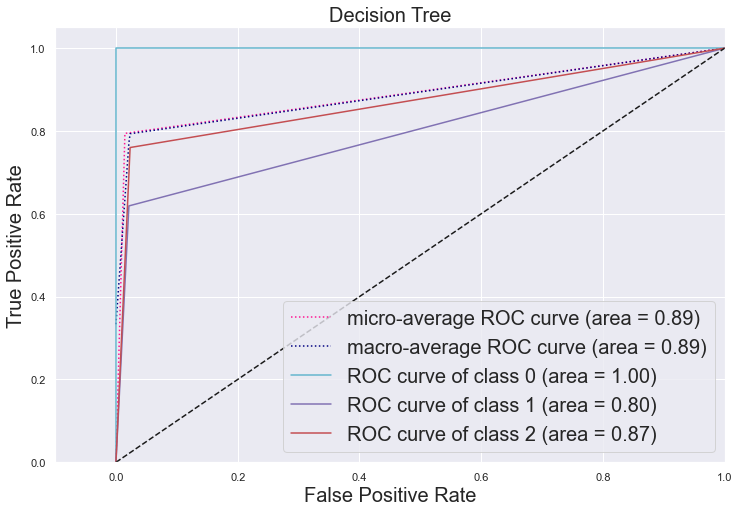

DATASET: Z12


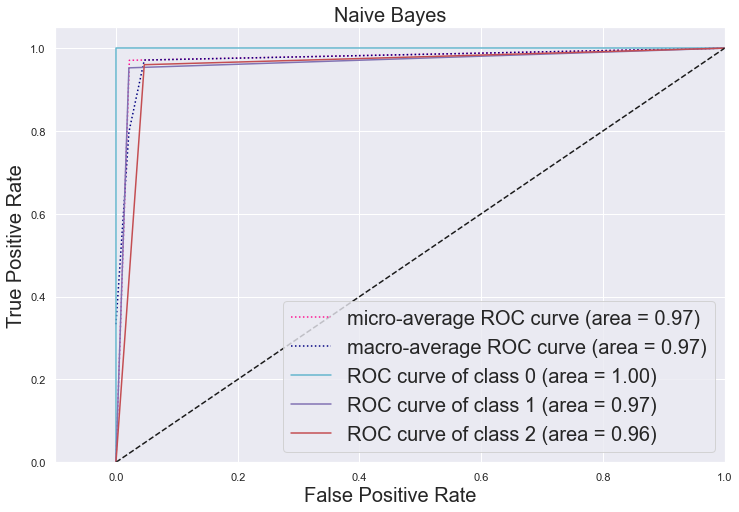

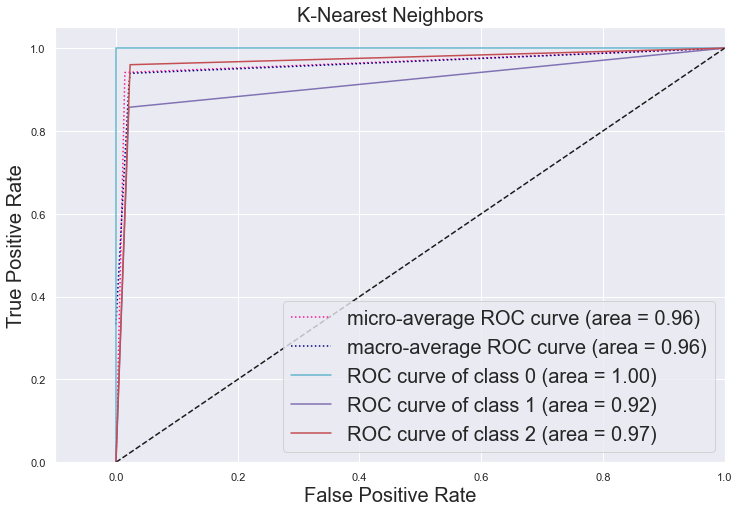

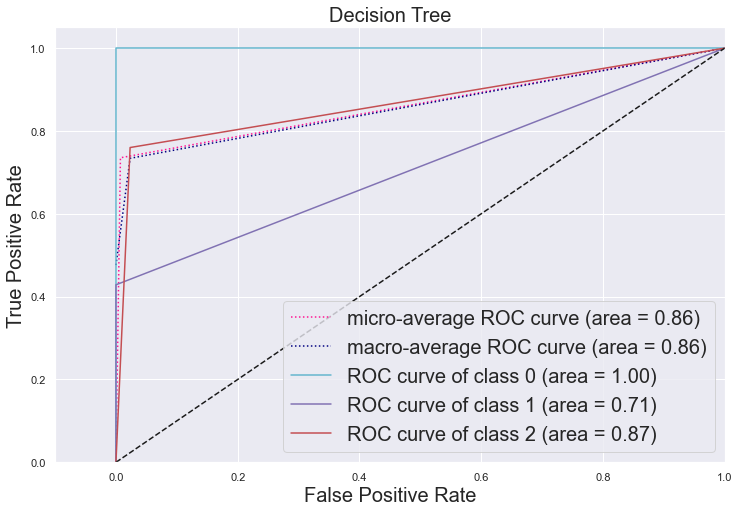

In [145]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate",size=20)
    plt.ylabel("True Positive Rate",size=20)
    plt.title(f'{algo_name}',size=20)
    plt.legend(fontsize=20)
    plt.show()

## **Bar Chart Plot**

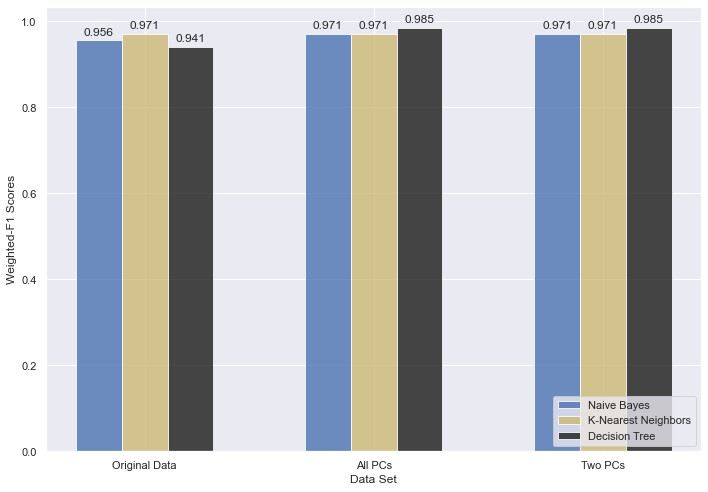

In [7]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.956, 0.971, 0.971)
KNN = (0.971, 0.971, 0.971)
DT = (0.941, 0.985, 0.985)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Weighted-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()